\begin{equation}\label{eq:6}
k_{n+1} = n^2 + k_n^2 - k_{n-1}
\end{equation}

\begin{equation}\label{eq:3}
123123
\end{equation}

\begin{equation}\label{eq:4}
\TeX
\end{equation}






In [161]:
wd = %pwd
wd = wd.replace('\\','//')

In [162]:
import pandas as pd
import numpy as np
import matplotlib
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

Time Series Analysis    

本节，你需要掌握
\begin{itemize}
    \item Timestamps,specific instants in time
    \item Fixed periods,such as the month January 2007 or the full year 2010
\end{itemize}

## Date and Time Date Types and Tools

### Basic Operations

|Operation|Description|
|---|---|
|datetime.now()|
|datetime()|
|| 
|| 
|| 
||
||
||

In [169]:
datetime.now()

datetime.datetime(2022, 1, 30, 21, 55, 17, 940382)

In [171]:
[datetime.now().year, datetime.now().month, datetime.now().day]

[2022, 1, 30]

In [172]:
datetime(2011,1,7) - datetime(2008,6,24,8,15)

datetime.timedelta(days=926, seconds=56700)

### Converting Between String and Datetime

|Operation|Description|
|---|---|
|datetime.strptime()|将已知格式字符串转化为datetime
|parse()|自动转化
|pd.to_datetime()|与parse()效果相同 
|| 
|| 
||
||
||

|Arguments|Description|
|---|---|
|%Y|Four-digit year 2001
|%y|Two-digit year 01
|%m|Two-digit month [0,12]
|%d|Two-digit day [01,31]
|%F|Shortcut for %Y-%m-%d 
||
||
||

In [173]:
stamp = datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [174]:
str(stamp)

'2011-01-03 00:00:00'

#### Dealing with a known format

datatime.strptime()

In [116]:
print(datetime.strptime('2011-01-03','%Y-%m-%d'))
print(datetime.strptime('2011-1-03','%Y-%m-%d'))
print(datetime.strptime('2011-1-3','%Y-%m-%d'))

2011-01-03 00:00:00
2011-01-03 00:00:00
2011-01-03 00:00:00


In [117]:
datestrs = ['7/6/2011','8/06/2008']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2008, 8, 6, 0, 0)]

#### Dealing with an unkown format

In [118]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [119]:
parse('3/8/2011')

datetime.datetime(2011, 3, 8, 0, 0)

In [120]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [121]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [122]:
#使用pd.to_datetime()能够达到与parse相同的效果
pd.to_datetime(['3/8/2011','6/12/2011','Jan 31, 1997 10:45 PM'])

DatetimeIndex(['2011-03-08 00:00:00', '2011-06-12 00:00:00',
               '1997-01-31 22:45:00'],
              dtype='datetime64[ns]', freq=None)

## Time Series Basics

In [123]:
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),
         datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]
ts = pd.Series(np.random.randn(6),index=dates)

In [124]:
ts

2011-01-02   -0.280023
2011-01-05   -0.753177
2011-01-07   -0.360693
2011-01-08    1.603951
2011-01-10   -0.395963
2011-01-12   -2.128443
dtype: float64

In [125]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

### Indexing,Selection,Subsetting

In [126]:
print(ts[ts.index[2]])
print(ts['2011-01-07'])
print(ts['01/07/2011'])

-0.36069271431540173
-0.36069271431540173
-0.36069271431540173


In [127]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('2000-01-01',periods=1000))

In [128]:
longer_ts

2000-01-01    1.150394
2000-01-02    0.835479
2000-01-03   -0.228549
2000-01-04   -0.324402
2000-01-05    0.646161
                ...   
2002-09-22    1.672843
2002-09-23   -1.570883
2002-09-24   -1.261979
2002-09-25    0.134635
2002-09-26   -1.470461
Freq: D, Length: 1000, dtype: float64

In [129]:
longer_ts['2001']

2001-01-01   -0.114619
2001-01-02   -2.061938
2001-01-03    0.613861
2001-01-04    1.574437
2001-01-05    0.190202
                ...   
2001-12-27   -0.296981
2001-12-28    0.878876
2001-12-29   -0.020151
2001-12-30    0.421209
2001-12-31   -0.248677
Freq: D, Length: 365, dtype: float64

In [130]:
longer_ts['2001-01-02']

-2.0619384270115337

In [131]:
longer_ts['2001-01-01':'2001-02-01']

2001-01-01   -0.114619
2001-01-02   -2.061938
2001-01-03    0.613861
2001-01-04    1.574437
2001-01-05    0.190202
2001-01-06   -0.049145
2001-01-07    0.205270
2001-01-08    0.906420
2001-01-09    1.022116
2001-01-10    0.723181
2001-01-11    0.387570
2001-01-12    1.585502
2001-01-13    0.797829
2001-01-14    0.777025
2001-01-15    0.193608
2001-01-16    1.254031
2001-01-17   -1.034930
2001-01-18    0.803480
2001-01-19   -0.992702
2001-01-20    1.323320
2001-01-21   -0.558715
2001-01-22    0.493688
2001-01-23   -1.168638
2001-01-24    1.939289
2001-01-25    0.736681
2001-01-26    0.083380
2001-01-27   -0.632395
2001-01-28    0.883039
2001-01-29    0.034320
2001-01-30    0.596278
2001-01-31    0.937094
2001-02-01   -0.617096
Freq: D, dtype: float64

In [132]:
# All of this holds true for DataFrame as well
dates =pd.date_range('2000-01-01',periods=100,freq='W-WED')

In [133]:
long_df = pd.DataFrame(np.random.randn(100,4),
                       index=dates,
                       columns=['Colorado','Texas','New York','Ohio'])

In [134]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.721500,0.044870,1.338779,1.093354
2000-01-12,-0.914031,-0.192359,1.102853,-0.783218
2000-01-19,-0.768179,-1.278805,-0.328481,-1.171907
2000-01-26,0.393744,0.790781,1.033383,0.758026
2000-02-02,1.246631,-2.407049,-0.732849,0.118031
...,...,...,...,...
2001-10-31,-0.293661,0.848283,1.410288,-0.646777
2001-11-07,1.197850,1.435922,-0.885478,0.934710
2001-11-14,0.099931,0.895945,-0.559768,-2.447421
2001-11-21,-0.897416,0.227125,1.753364,-1.108280


In [135]:
long_df.loc['2001-01',:]

,Colorado,Texas,New York,Ohio
2001-01-03,2.420887,0.492817,1.038973,0.478038
2001-01-10,-0.169443,1.135103,0.916463,-0.399355
2001-01-17,-1.757584,0.949679,-0.907038,0.731945
2001-01-24,-1.019276,-1.167275,-0.013335,0.268814
2001-01-31,0.619379,-1.045210,2.134583,-1.005868


### Time Series with Duplicate Indices

### Date Ranges,Frequencies,and Shifting

#### Generating Date Ranges

\begin{itemize}
    \itempd.date_range()
\end{itemize}

freq常用的参数   

|Arguments|Description|
|---|---|
|D|Calendar daily
|B|Business daily
|H|Hourly 
|min|Minutely 
|S|Secondly 
|--------|-----------------------------------------------------------------------------------------------|
|W-MON|Weekly on given day of week(MON,TUE,WED,THU,FRI,SAT,SUN)
|WOM-1MON|Week of Month
|--------|-----------------------------------------------------------------------------------------------|
|M|Last calendar day of month
|MS|First calendar day of month
|BM|Last business day of month
|BMS|Last business day of month
|--------|-----------------------------------------------------------------------------------------------|
|Q-JAN|Quarterly dates anchored on the last calendar day of each month,for year ending in indicated month
|QS-JAN|
|BQ-JAN|business
|BQS-JAN|business
|--------|-----------------------------------------------------------------------------------------------|
|A-JAN|Annual Dated anchored on last weekday of given month
|AS-JAN|YearBegin
|BA-JAN|
|BAS-JAN|

In [136]:
pd.date_range('2012-04-01','2012-06-01')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [137]:
pd.date_range('2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [138]:
pd.date_range('2000-01-01','2000-12-01',freq='Q')

DatetimeIndex(['2000-03-31', '2000-06-30', '2000-09-30'], dtype='datetime64[ns]', freq='Q-DEC')

In [139]:
pd.date_range('2000-01-01','2000-12-01',freq='4h')
pd.date_range('2000-01-01','2000-12-01',freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00',
               ...
               '2000-11-30 10:30:00', '2000-11-30 12:00:00',
               '2000-11-30 13:30:00', '2000-11-30 15:00:00',
               '2000-11-30 16:30:00', '2000-11-30 18:00:00',
               '2000-11-30 19:30:00', '2000-11-30 21:00:00',
               '2000-11-30 22:30:00', '2000-12-01 00:00:00'],
              dtype='datetime64[ns]', length=5361, freq='90T')

In [140]:
pd.date_range('2000-01-01','2000-12-01',freq='WOM-3FRI')

DatetimeIndex(['2000-01-21', '2000-02-18', '2000-03-17', '2000-04-21',
               '2000-05-19', '2000-06-16', '2000-07-21', '2000-08-18',
               '2000-09-15', '2000-10-20', '2000-11-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

#### Shifting (Leading and Lagging) Data

In [175]:
ts = pd.Series(np.random.randn(8),
               index=pd.date_range('2000-01-01',periods=8,freq='M'))

In [176]:
ts

2000-01-31   -2.010929
2000-02-29    0.185985
2000-03-31    0.259871
2000-04-30    1.843788
2000-05-31    0.058485
2000-06-30   -0.962668
2000-07-31    0.967339
2000-08-31   -0.565737
Freq: M, dtype: float64

In [177]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -2.010929
2000-04-30    0.185985
2000-05-31    0.259871
2000-06-30    1.843788
2000-07-31    0.058485
2000-08-31   -0.962668
Freq: M, dtype: float64

In [178]:
ts.shift(-2)

2000-01-31    0.259871
2000-02-29    1.843788
2000-03-31    0.058485
2000-04-30   -0.962668
2000-05-31    0.967339
2000-06-30   -0.565737
2000-07-31         NaN
2000-08-31         NaN
Freq: M, dtype: float64

In [186]:
pd.concat([ts,ts.shift(2)],axis=1)
# pd.concat([ts,ts.shift(2)],axis=1).dropna()

,0,1
2000-01-31,-2.010929,NaN
2000-02-29,0.185985,NaN
2000-03-31,0.259871,-2.010929
2000-04-30,1.843788,0.185985
2000-05-31,0.058485,0.259871
2000-06-30,-0.962668,1.843788
2000-07-31,0.967339,0.058485
2000-08-31,-0.565737,-0.962668


## periods and Period Arithmetic

In [187]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [188]:
p+2

Period('2009', 'A-DEC')

In [189]:
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [190]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -0.536515
2000-02    1.021953
2000-03   -0.631463
2000-04    1.185292
2000-05    0.376404
2000-06   -0.560056
Freq: M, dtype: float64

In [191]:
values = ['2001Q3', '2001Q2', '2001Q1']
index = pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2001Q2', '2001Q1'], dtype='period[Q-DEC]')

### Period Frequency Conversion

一个例子

In [192]:
data = pd.read_csv(wd+'//pydata-book//examples//macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [193]:
index =pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
data.index = index
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


## Resampling and Frequency Conversion

### Resample

\begin{itemize}
\item Resample与groupby类似
\end{itemize}


In [210]:
rng = pd.date_range('2000-01-01',periods=300,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
df = pd.DataFrame(np.random.randn(len(rng),3),index=rng)

In [211]:
ts

2000-01-01   -2.643991
2000-01-02   -1.942412
2000-01-03   -1.612570
2000-01-04   -0.483432
2000-01-05    1.067185
                ...   
2000-10-22   -1.001597
2000-10-23    1.055778
2000-10-24   -0.732255
2000-10-25    0.223735
2000-10-26   -0.523812
Freq: D, Length: 300, dtype: float64

In [212]:
ts.resample('M').apply(lambda x:x.mean()) 

2000-01-31   -0.181261
2000-02-29    0.192845
2000-03-31   -0.183918
2000-04-30   -0.073408
2000-05-31   -0.156248
2000-06-30    0.035723
2000-07-31   -0.005104
2000-08-31    0.231354
2000-09-30    0.047307
2000-10-31   -0.310668
Freq: M, dtype: float64

In [213]:
ts.resample('M').ohlc()

,open,high,low,close
2000-01-31,-2.643991,2.436611,-2.643991,-1.192702
2000-02-29,1.163893,1.907728,-1.992195,-1.305172
2000-03-31,-2.089119,1.761720,-2.089119,-0.583230
2000-04-30,0.275066,2.049087,-1.930031,0.522185
2000-05-31,-0.018022,1.695470,-1.820829,-1.320868
2000-06-30,-1.067463,2.072135,-1.710178,-0.354351
2000-07-31,-0.203180,2.799562,-1.638979,-0.718569
2000-08-31,-0.510008,2.477031,-1.710252,2.167392
2000-09-30,-1.149094,2.139190,-2.268276,-1.505101
2000-10-31,0.125675,1.282277,-2.723087,-0.523812


In [218]:
df.resample('WOM-3FRI').mean()

,0,1,2
1999-12-17,0.271609,-0.269671,-0.016610
2000-01-21,-0.120137,-0.172518,0.527082
2000-02-18,-0.076165,0.039669,-0.158459
2000-03-17,-0.147086,-0.052820,-0.198561
2000-04-21,-0.158809,0.268693,-0.025381
2000-05-19,-0.211102,0.007323,0.123907
2000-06-16,0.023680,0.024058,-0.031169
2000-07-21,-0.004149,-0.037499,0.033176
2000-08-18,0.207916,0.173699,-0.027898
2000-09-15,0.092974,-0.270848,0.066451


In [267]:
#观察对于DataFrame是如何切片的，与groupby不同了
df.resample('M').apply(lambda x:print(x))

2000-01-01    0.167026
2000-01-02   -1.119194
2000-01-03    0.909978
2000-01-04    2.128868
2000-01-05    0.791556
2000-01-06    0.364367
2000-01-07   -1.408679
2000-01-08    0.708770
2000-01-09   -0.738737
2000-01-10    0.986717
2000-01-11    2.539534
2000-01-12   -1.052169
2000-01-13    0.150980
2000-01-14    1.992444
2000-01-15    1.576504
2000-01-16   -1.877782
2000-01-17    0.434740
2000-01-18   -1.739218
2000-01-19    0.004741
2000-01-20    0.611736
2000-01-21   -0.217458
2000-01-22    0.241150
2000-01-23   -1.111170
2000-01-24   -1.129988
2000-01-25   -0.829819
2000-01-26   -0.105410
2000-01-27    0.187652
2000-01-28   -0.732756
2000-01-29   -0.429836
2000-01-30    0.971777
2000-01-31    1.060241
Freq: D, Name: 0, dtype: float64
2000-02-01    0.891776
2000-02-02   -1.246799
2000-02-03    0.655603
2000-02-04   -0.192931
2000-02-05   -1.025273
2000-02-06    0.276832
2000-02-07   -1.250294
2000-02-08   -1.292736
2000-02-09   -0.479901
2000-02-10   -1.184339
2000-02-11   -0.672949
2

,0,1,2
2000-01-31,None,None,None
2000-02-29,None,None,None
2000-03-31,None,None,None
2000-04-30,None,None,None
2000-05-31,None,None,None
2000-06-30,None,None,None
2000-07-31,None,None,None
2000-08-31,None,None,None
2000-09-30,None,None,None
2000-10-31,None,None,None


## Moving Window Functions

In [268]:
close_px_all = pd.read_csv(wd+'//pydata-book//examples//stock_px_2.csv',parse_dates=True,index_col=0)
close_px = close_px_all[['AAPL','MSFT','XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

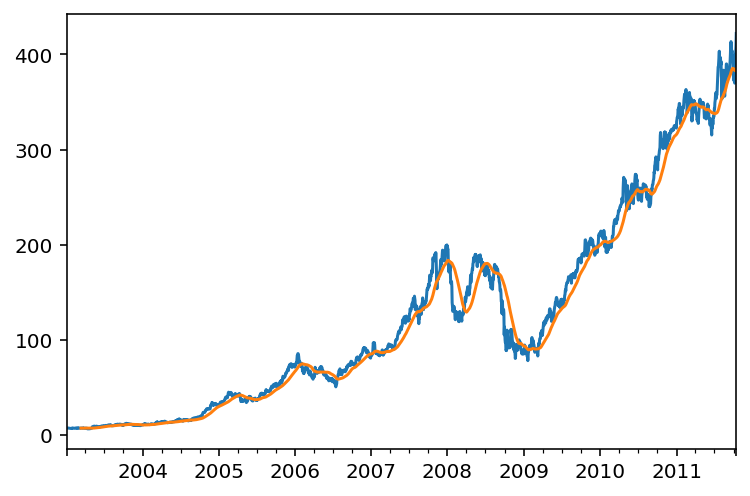

In [269]:
close_px.AAPL.plot()
close_px.AAPL.rolling(50).mean().plot()

In [270]:
lin = close_px.iloc[range(20),:]
lin

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


\begin{itemize}
\item X.rolling(k).apply(lambda x:f(x))---(4)
\item X.rolling(k).mean()---(5)
\end{itemize}

\begin{equation}\label{eq:4}
Y_{n} = f(X_{n},X_{n-1},\dots,X_{n+1-k})
\end{equation}

\begin{equation}\label{eq:5}
Y_{n} =  \frac{X_{n}+X_{n-1}+\dots+X_{n+1-k}}{k} 
\end{equation}



In [271]:
lin['AAPL'].rolling(3).apply(lambda x:x[0]+x[1])

2003-01-02      NaN
2003-01-03      NaN
2003-01-06    14.85
2003-01-07    14.90
2003-01-08    14.88
2003-01-09    14.71
2003-01-10    14.62
2003-01-13    14.70
2003-01-14    14.68
2003-01-15    14.62
2003-01-16    14.52
2003-01-17    14.53
2003-01-20    14.36
2003-01-21    14.10
2003-01-22    14.06
2003-01-23    13.95
2003-01-24    14.03
2003-01-27    13.99
2003-01-28    13.97
2003-01-29    14.36
Freq: B, Name: AAPL, dtype: float64